In [6]:
import json
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
# Open the JSON file
with open('../moq_analysis/average_data/res1080fps30bit6gop(2,99,95)loss0delay0bw100 (avg).json', 'r') as file:
    json_data_data_0 = json.load(file)

# Convert JSON data to DataFrame
df_data_0 = pd.DataFrame(json_data_data_0)

# Add percentage of rendered frames for comparison
df_data_0.at[0, 'avg_percentage_rendered_frames'] = df_data_0['avg_rendered_frames'].iloc[0] / df_data_0['avg_total_frames'].iloc[0] * 100

In [8]:
# Open the JSON file
with open('../dash_analysis/average_data/dash_frag100res1080fps30bit6gop2loss0delay0bw100 (avg).json', 'r') as file:
    json_data_data_1 = json.load(file)

# Convert JSON data to DataFrame
df_data_1 = pd.DataFrame(json_data_data_1)

In [9]:
# Extract the continuous data
timestamps_0 = df_data_0['_1_rawVideoTimestamp']
timestamps_1 = df_data_1['second']

total_time_0 = df_data_0['_8_totalTime']
total_time_1 = df_data_1['totalLatency']
behind_live_1 = df_data_1['behindLive']
buffer_1 = df_data_1['buffer']

# Extract the first index values for the other metrics
moq_metrics = ['avg_total_frames', 'avg_received_frames', 'avg_rendered_frames', 
           'avg_percentage_received_frames', 'avg_percentage_rendered_frames', 'avg_skipped_frames', 'avg_render_time_difference', 
           'avg_num_of_stall_events', 'avg_stall_duration', 'avg_i_frames', 'avg_gop_size_frames', 
           'avg_gop_size_time', 'avg_total_time', 'avg_25th_percentile_total_time', 
           'avg_50th_percentile_total_time', 'avg_75th_percentile_total_time', 'avg_std_dev_total_time', 
           'avg_encoding_time', 'avg_propagation_time', 'avg_decoding_time', 'avg_received_bitrate', 
           'avg_fps']

dash_metrics = ['avg_total_frames', 'avg_rendered_frames', 'avg_skipped_frames',
           'avg_percentage_rendered_frames', 'avg_num_of_stall_events',
           'avg_stall_duration', 'avg_behindLive', 'avg_buffer', 'avg_total_time', 'avg_25th_percentile_total_time', 
           'avg_50th_percentile_total_time', 'avg_75th_percentile_total_time', 'avg_std_dev_total_time', 
           'avg_received_bitrate', 'avg_fps']

# Common metrics mappings between MOQ and DASH
common_metrics = {
    'avg_total_frames': 'avg_total_frames',
    'avg_rendered_frames': 'avg_rendered_frames',
    'avg_skipped_frames': 'avg_skipped_frames',
    'avg_percentage_rendered_frames': 'avg_percentage_rendered_frames',
    'avg_num_of_stall_events': 'avg_num_of_stall_events',
    'avg_stall_duration': 'avg_stall_duration',
    'avg_total_time': 'avg_total_time',
    'avg_25th_percentile_total_time': 'avg_25th_percentile_total_time',
    'avg_50th_percentile_total_time': 'avg_50th_percentile_total_time',
    'avg_75th_percentile_total_time': 'avg_75th_percentile_total_time',
    'avg_std_dev_total_time': 'avg_std_dev_total_time',
    'avg_received_bitrate': 'avg_received_bitrate',
    'avg_fps': 'avg_fps'
}

# Unique metrics for each protocol
unique_metrics_moq = set(moq_metrics) - set(common_metrics.keys())
unique_metrics_dash = set(dash_metrics) - set(common_metrics.values())

# Extract the first index values for the metrics
metric_values_moq = {metric: df_data_0[metric].iloc[0] for metric in moq_metrics if metric in df_data_0.columns}
metric_values_dash = {metric: df_data_1[metric].iloc[0] for metric in dash_metrics if metric in df_data_1.columns}

# Metrics Comparison for common metrics
print("\n=== Common Metrics Comparison ===")
for moq_metric, dash_metric in common_metrics.items():
    moq_value = metric_values_moq.get(moq_metric, 'N/A')
    dash_value = metric_values_dash.get(dash_metric, 'N/A')
    print("{} (MOQ) vs {} (DASH): {:.2f} vs {:.2f}".format(
        moq_metric, dash_metric,
        moq_value if moq_value != 'N/A' else float('nan'),
        dash_value if dash_value != 'N/A' else float('nan')
    ))

# Display unique metrics for MOQ
print("\n=== Unique Metrics for MOQ ===")
for metric in unique_metrics_moq:
    value = metric_values_moq.get(metric, 'N/A')
    print("{}: {:.2f}".format(
        metric,
        value if value != 'N/A' else float('nan')
    ))

# Display unique metrics for DASH
print("\n=== Unique Metrics for DASH ===")
for metric in unique_metrics_dash:
    value = metric_values_dash.get(metric, 'N/A')
    print("{}: {:.2f}".format(
        metric,
        value if value != 'N/A' else float('nan')
    ))


=== Common Metrics Comparison ===
avg_total_frames (MOQ) vs avg_total_frames (DASH): 1800.00 vs 1781.33
avg_rendered_frames (MOQ) vs avg_rendered_frames (DASH): 1800.00 vs 1708.67
avg_skipped_frames (MOQ) vs avg_skipped_frames (DASH): 0.00 vs 72.67
avg_percentage_rendered_frames (MOQ) vs avg_percentage_rendered_frames (DASH): 100.00 vs 95.92
avg_num_of_stall_events (MOQ) vs avg_num_of_stall_events (DASH): 241.67 vs 73.00
avg_stall_duration (MOQ) vs avg_stall_duration (DASH): 666.67 vs 975.00
avg_total_time (MOQ) vs avg_total_time (DASH): 56.34 vs 142.15
avg_25th_percentile_total_time (MOQ) vs avg_25th_percentile_total_time (DASH): 53.00 vs 128.33
avg_50th_percentile_total_time (MOQ) vs avg_50th_percentile_total_time (DASH): 56.33 vs 138.33
avg_75th_percentile_total_time (MOQ) vs avg_75th_percentile_total_time (DASH): 59.33 vs 154.33
avg_std_dev_total_time (MOQ) vs avg_std_dev_total_time (DASH): 4.98 vs 20.14
avg_received_bitrate (MOQ) vs avg_received_bitrate (DASH): 6.00 vs 6.00
avg_f

In [10]:
pd.options.display.float_format = '{:.2f}'.format
table_data = {
    'MoQ': [
        df_data_0['avg_percentage_rendered_frames'].iloc[0],
        df_data_0['avg_skipped_frames'].iloc[0],
        df_data_0['avg_stall_duration'].iloc[0],
        df_data_0['avg_total_time'].iloc[0]
    ],
    'DASH': [
        df_data_1['avg_rendered_frames'].iloc[0] / 1800 * 100,
        1800 - df_data_1['avg_rendered_frames'].iloc[0],
        df_data_1['avg_stall_duration'].iloc[0],
        df_data_1['avg_total_time'].iloc[0]
    ],
}
row_labels = ['Frame Render Rate (%)', 'Number of Skipped Frames', 'Stall Duration (ms)', 'Average Latency (ms)']
table = pd.DataFrame(table_data, index=row_labels)
table


,MoQ,DASH
Frame Render Rate (%),100.00,94.93
Number of Skipped Frames,0.00,91.33
Stall Duration (ms),666.67,975.00
Average Latency (ms),56.34,142.15


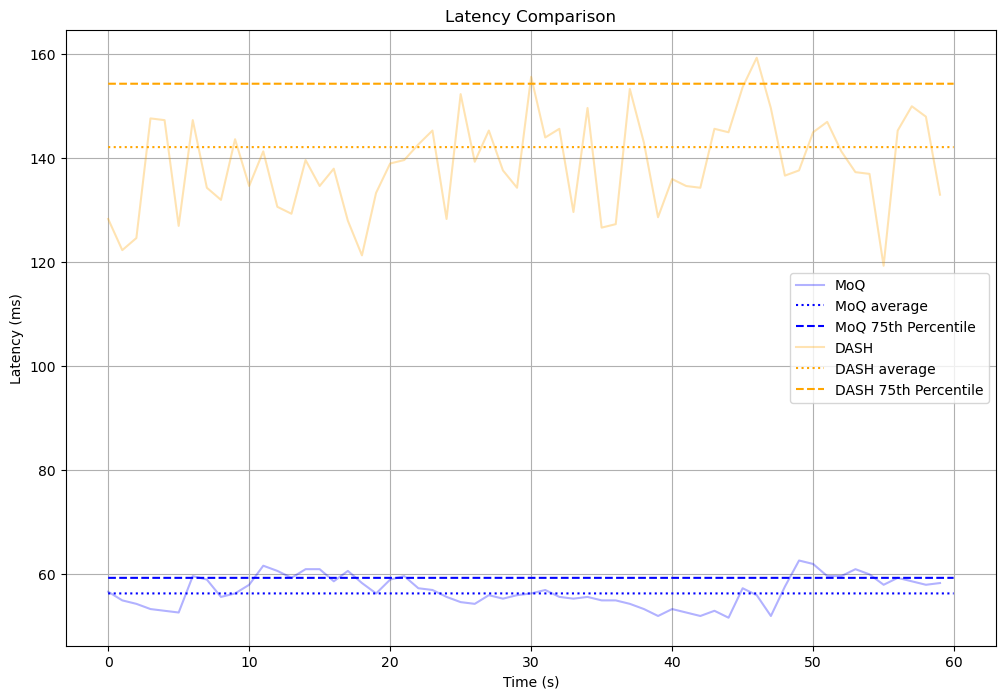

In [11]:
# Function to sample and smooth the data
def sample_and_smooth(data, timestamp_col, value_col, sample_rate=1, window_size=30):
    # Sampling
    sampled_data = data.iloc[::sample_rate, :]
    
    # Smoothing using a rolling window
    smoothed_values = sampled_data[value_col].rolling(window=window_size).mean()
    
    return sampled_data[timestamp_col], smoothed_values

# Sampling rate and window size for smoothing
sample_rate = 30  # Take every 30th frame
window_size = 1  # Rolling window size for smoothing

# Plotting
plt.figure(figsize=(12, 8))

# Sample and smooth data for each scenario
timestamps_0, smoothed_0 = sample_and_smooth(df_data_0, '_1_rawVideoTimestamp', '_8_totalTime', sample_rate, window_size)
timestamps_1, smoothed_1 = sample_and_smooth(df_data_1, 'second', 'totalLatency', sample_rate, window_size)

# Plotting the smoothed data
plt.plot(timestamps_0, smoothed_0, label='MoQ', color='blue', alpha=0.3)
plt.plot(df_data_0['_1_rawVideoTimestamp'], [df_data_0['avg_total_time'].iloc[0]] * len(df_data_0), label='MoQ average', color='blue', linestyle='dotted')
plt.plot(df_data_0['_1_rawVideoTimestamp'], [df_data_0['avg_75th_percentile_total_time'].iloc[0]] * len(df_data_0), label='MoQ 75th Percentile', color='blue', linestyle='dashed')

plt.plot(timestamps_1, smoothed_1, label='DASH', color='orange', alpha=0.3)
plt.plot(df_data_1['second'], [df_data_1['avg_total_time'].iloc[0]] * len(df_data_1), label='DASH average', color='orange', linestyle='dotted')
plt.plot(df_data_1['second'], [df_data_1['avg_75th_percentile_total_time'].iloc[0]] * len(df_data_1), label='DASH 75th Percentile', color='orange', linestyle='dashed')

# Adding labels, grid, and legend
plt.xlabel('Time (s)')
plt.ylabel('Latency (ms)')
plt.grid(True)
plt.legend()
plt.title('Latency Comparison')
plt.show()
